## Labb 1

Jag har använt mig av, google, w3 schools, chat GPT och klasskamrater för att lösa de här uppgifterna

### A function with input of Pichu and Pikachu files where we clean the data

In [ ]:
import numpy as np

def cleaned_files(file_path, label):
    clean_files = []
    with open(file_path, "r") as file:
        for line in file:
            # Skips the row if it has width or height in it
            if "width (cm)" in line or "height (cm)" in line:
                continue
            # Removes () and splits the row at "," to separate decimals
            rows = line.strip().strip("()").split(",")

            # Converts decimals to floats and rounds them of to only have two decimals
            x = round(float(rows[0]), 2)
            y = round(float(rows[1]), 2)
            # Adds label of either pichu or pikachu.
            clean_files.append([x, y, label])
    return clean_files

# Adds labels on Pichu and Pikachu based on the filename(x, y, label)
pichu_label = 0
pikachu_label = 1

# Uses the function to clean the files and adds the labels from above
Pichu_data = cleaned_files("../data/pichu.txt", pichu_label)
Pikachu_data = cleaned_files("../data/pikachu.txt", pikachu_label)

Pichu_data
Pikachu_data

### Takes the variables/data from above and puts them in a dataframe so we can concatenate it into one file

In [107]:
import pandas as pd

p1 = pd.DataFrame(Pichu_data)
p2 = pd.DataFrame(Pikachu_data)

# Adds Pichu data and Pikachu data into one variabel with collected data
pokemon_data = pd.concat([p1, p2])

In [ ]:
# Makes the list into a 2d array
pokemon_data = np.array(pokemon_data)
pokemon_data

### Function to "export" pichu and pikachu cleaned data to new files

In [ ]:
def output_cleaned_file(file_path, data):
    with open(file_path, "w") as file:
        for row in enumerate(data):
            x, y, type = row
            file.write(f"({x:.2f}, {y:.2f}, '{type}')\n") # Goes through the files and exports x with two decimals, y eith two decimals and the label

output_cleaned_file("../data/pichu_cleanedup.txt", Pichu_data)
output_cleaned_file("../data/pikachu_cleanedup.txt", Pikachu_data)

### Function to read, clean and "export" a file of test points

In [111]:
# Where the file can be found
test_points_path = "../data/test_points.txt"

# Output cleaned file to this location
TP_output_path = "../data/TP_cleanedup.txt"
rounded_TP = []

# Reads from and outputs to these locations
with open(test_points_path, "r") as TP_file, open(TP_output_path, 'w') as TP_output_file:
    for line in TP_file:
        # removes blankspaces
        cleaned_TP = line.replace(' ', '')
        # Splits the string into a list
        points_list = cleaned_TP.split('),(')

        for point_str in points_list:
            
            # Removes () and splits at ,
            x, y = map(float, point_str.strip('()').split(','))
            # map() is a built-in Python function. Used to apply a given function to each element in a sequence 
            # (such as a list or tuple) and return a new sequence of the results.
        
            # Adds the elements to the rounded list as a tuple instead of a formated string
            rounded_TP.append((x, y))

        # Outputs each element in roundeed_TP to the file
        for point in rounded_TP:
            TP_output_file.write(f"({point[0]}, {point[1]})\n")

        TP_cleaned = np.array(rounded_TP)

    print(rounded_TP) # List of tupels
    print(TP_cleaned) # 2D array

[(25.0, 35.0), (15.0, 14.0), (26.0, 30.0), (22.0, 45.0)]
[[25. 35.]
 [15. 14.]
 [26. 30.]
 [22. 45.]]


### Basetask of just plotting the testpoints in matplotlib

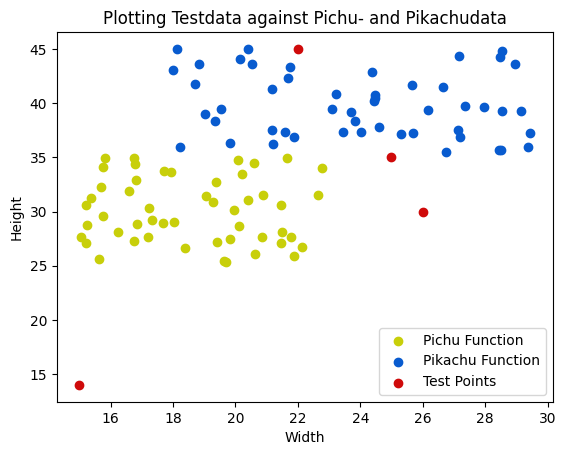

In [146]:
import matplotlib.pyplot as plt

# Function to read x, y och label from files
def read_data(file_path):
    x_values = []
    y_values = []
    labels = []

    with open(file_path, 'r') as file:
        for line in file:
           
           # Removes () and linebreaks and splits row at ,
            line = line.strip('()\n ')
            values = line.split(',')

            # Checks if row has two element
            if len(values) >= 2:
                x, y = map(float, values[:2])  # Picks out the first two elemants (x, y) with two decimals
                x_values.append(x)
                y_values.append(y)

                # If there's three elements this adds a label of typ
                if len(values) == 3:
                    label = values[2].strip()
                    labels.append(label)

    return x_values, y_values, labels

# Function of scatter
def plot_scatter(x, y, label, color):
    plt.scatter(x, y, label=label, color=color)

def main():

    # Reads data for Pichu, Pikachu and Test point files
    pichu_x, pichu_y, pichu_labels = read_data("../data/pichu_cleanedup.txt")
    pikachu_x, pikachu_y, pikachu_labels = read_data("../data/pikachu_cleanedup.txt")
    TP_format_x, TP_format_y, TP_labels = read_data("../data/TP_cleanedup.txt")
    
    # Plotting the scatter function and adds the label(legend names) and what color the dots whould have
    plt.scatter(pichu_x, pichu_y, label="Pichu Function", color= '#c8cf0a')
    plt.scatter(pikachu_x, pikachu_y, label="Pikachu Function", color= '#085bcf')
    plt.scatter(TP_format_x, TP_format_y, label="Test Points", color='#cf0a0a')

    # Adds titel and label on each axel and an overall graphtitel
    plt.title("Plotting Testdata against Pichu- and Pikachudata")
    plt.xlabel("Width")
    plt.ylabel("Height")

    # Uses the label we set in scatter and won't need more info
    plt.legend()
    
    # Displays the graph
    plt.show()

main()

### Same as the code above with the diference that this code tests to see if Pichu or Pikachu are closest to our testpoints and decides which one it is most likely to be.

C:\Users\Sandra\AppData\Local\Temp\ipykernel_28472\650671181.py:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x, y, label=label, c=color)


Testpunkt 1: Närmast Pichu-punkt är på avstånd 2.44. Närmast Pikachu-punkt är på avstånd 1.83.
Sample with (width, height): (25.0, 35.0) classified as Pikachu

Testpunkt 2: Närmast Pichu-punkt är på avstånd 11.66. Närmast Pikachu-punkt är på avstånd 22.21.
Sample with (width, height): (15.0, 14.0) classified as Pichu

Testpunkt 3: Närmast Pichu-punkt är på avstånd 3.68. Närmast Pikachu-punkt är på avstånd 5.56.
Sample with (width, height): (26.0, 30.0) classified as Pichu

Testpunkt 4: Närmast Pichu-punkt är på avstånd 10.03. Närmast Pikachu-punkt är på avstånd 1.59.
Sample with (width, height): (22.0, 45.0) classified as Pikachu



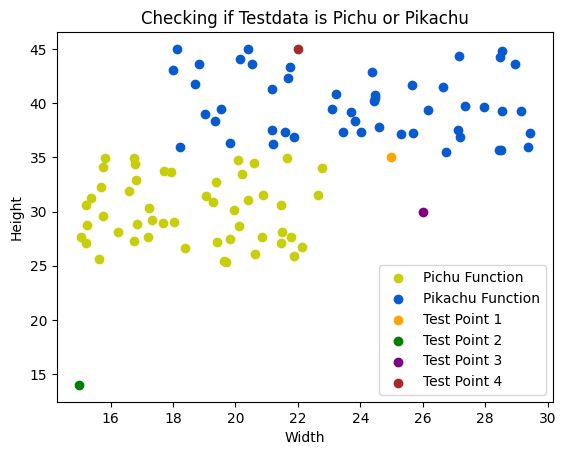

In [138]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Function to read x, y och label from files
def read_data(file_path):
    x_values = []
    y_values = []
    labels = []

    with open(file_path, 'r') as file:
        for line in file:
           
           # Removes () and linebreaks and splits row at ,
            line = line.strip('()\n ')
            values = line.split(',')

            # Checks if row has two element
            if len(values) >= 2:
                x, y = map(float, values[:2])  # Picks out the first two elemants (x, y) with two decimals
                x_values.append(x)
                y_values.append(y)

                # If there's three elements this adds a label of typ
                if len(values) == 3:
                    label = values[2].strip()
                    labels.append(label)

    # Used to create tuples with these tre variables 
    # These variables are already used to collect x, y and label for Pichu, Pikachu Pikachu and the testpoints in the rest of the code
    return np.array(x_values), np.array(y_values), labels

# Function for scatter
def plot_scatter(x, y, label, color=None):
    # color=None: Paramater that specifies the color of the dots 
    # If no color has been assigned (color=None), scatter will use the preset color. If assigned, that color is used
    if color is not None:
        plt.scatter(x, y, label=label, c=color)
    else:
        plt.scatter(x, y, label=label)

def distances_and_type(TP_format_x, TP_format_y, pichu_x, pichu_y, pikachu_x, pikachu_y):
    # CHAT GPT Explanation: pichu_distances: This calculates the distance between each test point and each Pichu point using the formula for
    # the distance between two points in a 2D space (np.sqrt((TP_format_x[:, np.newaxis] - pichu_x)**2 + (TP_format_y[:, np.newaxis] - pichu_y)**2)).
    # It creates a matrix of distances where each row represents the distance between a test point and each Pichu point. The same is done for Pikachu.
    # Originally, TP_format_x is a 1D array containing the x-coordinates of the test points, but here it is reshaped to 2D.
    # By adding a new axis, we get a 2D array where each row represents a test point.
    # This is the difference in x-coordinate between each test point and each Pichu point.
    # The result is a 2D array where each element represents the difference in x-coordinate between a test point and a Pichu point.
    # This is the square of the distance in x plus the square of the distance in y for each test point-Pichu point pair. It gives us the square of the Euclidean distance for each pair.
    # Finally, this takes the square root of what has been calculated above, giving the actual Euclidean distance between each test point and each Pichu point.

    pichu_distances = np.sqrt((TP_format_x[:, np.newaxis] - pichu_x)**2 + (TP_format_y[:, np.newaxis] - pichu_y)**2)
    pikachu_distances = np.sqrt((TP_format_x[:, np.newaxis] - pikachu_x)**2 + (TP_format_y[:, np.newaxis] - pikachu_y)**2)

    # closest_pichu_indices och closest_pikachu_indices: These use np.argmin to find the index of the closest Pichu- och Pikachu-points for each testpoint
    closest_pichu_indices = np.argmin(pichu_distances, axis=1)
    closest_pikachu_indices = np.argmin(pikachu_distances, axis=1)

    # closest_pichu_distances och closest_pikachu_distances: 
    # These use the index from above snippet to get the distance of the colsest Pichu- och Pikachu-points for each testpoint
    closest_pichu_distances = pichu_distances[np.arange(len(TP_format_x)), closest_pichu_indices]
    closest_pikachu_distances = pikachu_distances[np.arange(len(TP_format_x)), closest_pikachu_indices]

    # classifications: This uses np.where to compare distance and to classify 
    # each testpoint as either "Pichu" eller "Pikachu" depending on what distance is the furthest
    classifications = np.where(closest_pichu_distances < closest_pikachu_distances, "Pichu", "Pikachu")

    # This function returns the closest distance to Pichu och Pikachu as well as the classification of every testpoint
    return closest_pichu_distances, closest_pikachu_distances, classifications

def main():

    # Reads the previously cleaned data for the Pichu, Pikachu and Testpoint files
    pichu_data = read_data("../data/pichu_cleanedup.txt")
    pikachu_data = read_data("../data/pikachu_cleanedup.txt")
    TP_data = read_data("../data/TP_cleanedup.txt")
    
    pichu_x, pichu_y, _ = pichu_data
    pikachu_x, pikachu_y, _ = pikachu_data
    TP_format_x, TP_format_y, _ = TP_data

    # Previously defined function 
    # This takes in six parameters: TP_format_x, TP_format_y, pichu_x, pichu_y, pikachu_x, och pikachu_y
    closest_pichu_distances, closest_pikachu_distances, classifications = distances_and_type(
        TP_format_x, TP_format_y, pichu_x, pichu_y, pikachu_x, pikachu_y)
    # closest_pichu_distances: This is an array containing the distance of each testpoint to the closest Pichu-point. Same goes for Pikachu
    
    # Plotts the points and adds label(legend-names) and what color the dots should have
    plot_scatter(pichu_x, pichu_y, label="Pichu Function", color='#c8cf0a')
    plot_scatter(pikachu_x, pikachu_y, label="Pikachu Function", color='#085bcf')

    # Uses an adapted colorscale for the testpoints
    colors = ['orange', 'green', 'purple', 'brown', 'hotpink']

    # Creates an adapted colormapping for the testpoints (colormap)
    cmap = ListedColormap(colors)
    for i, (x, y, label) in enumerate(zip(TP_format_x, TP_format_y, classifications)):
        plot_scatter(x, y, label=f"Test Point {i+1}", color=cmap(i))
       
    # Prints results
    for i in range(len(TP_format_x)):
        print(f"Testpunkt {i+1}: Närmast Pichu-punkt är på avstånd {closest_pichu_distances[i]:.2f}. Närmast Pikachu-punkt är på avstånd {closest_pikachu_distances[i]:.2f}.")

        # Decides which piont is closest to testpoint "i"
        if closest_pichu_distances[i] < closest_pikachu_distances[i]:
            closest_pokemon = "Pichu"
        else:
            closest_pokemon = "Pikachu"

        print(f"Sample with (width, height): ({TP_format_x[i]}, {TP_format_y[i]}) classified as {closest_pokemon}")
        print()

    # Adds titel and label on each axel and an overall graphtitel
    plt.title("Checking if Testdata is Pichu or Pikachu")
    plt.xlabel("Width")
    plt.ylabel("Height")

    plt.legend()

    plt.show()

main()

pichu_classification = 1.0
pikachu_classification = 1.0


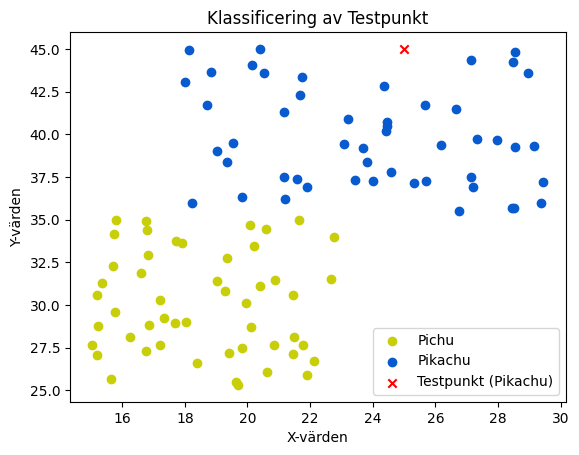

In [144]:
import matplotlib.pyplot as plt
from scipy.spatial import distance
import numpy as np

def read_data(pokemon_clean):
    x_values = []
    y_values = []
    labels = []

    label_to_code = {}  # En dictionary för att kartlägga etiketter till numeriska koder
    code_counter = 1  # En räknare för att tilldela unika koder till varje etikett

    with open(pokemon_clean, 'r') as pokemon_cleaned:
        for line in pokemon_cleaned:
            # Tar bort parenteser och radbrytningar och splittar vid ,-tecken
            line = line.strip('()\n ')
            values = line.split(',')

            # Kontrollerar om raden innehåller exakt två värden
            if len(values) >= 2:
                x, y = map(float, values[:2])  # Tar ut de första två värdena (x, y) med två decimaler.
                x_values.append(x)
                y_values.append(y)

                # Finns tre värden så läggs etiketten (pokemon typ) till.
                if len(values) == 3:
                    label = values[2].strip()
                    
                    # Kolla om etiketten redan har en tilldelad kod, annars tilldela en ny kod
                    if label not in label_to_code:
                        label_to_code[label] = code_counter
                        code_counter += 1

                    labels.append(label_to_code[label])

    # Används för att skapa tuples med dessa tre variabler.
    # Dessa variabler används sedan för att hämta x-värden, y-värden och etiketter för Pichu, Pikachu och testpunkter i resten av koden.
    return np.array(x_values), np.array(y_values), np.array(labels)

def classify_sample(user_test_point, pokemon_data_x, pokemon_data_y, pokemon_data_labels):
    # Skapar en array med koordinaterna för träningsdatan och skapar en 2D array
    training_data_points = np.column_stack((pokemon_data_x, pokemon_data_y, pokemon_data_labels))

    # Skapar en array med koordinaterna för testpunkten
    test_point_array = np.array([user_test_point[0], user_test_point[1]])

    # cdist beräknar avståndet mellan testpunkten och all träningsdata
    distances = distance.cdist(test_point_array.reshape(1, -1), training_data_points[:, :2])

    # Sorterar avstånden och väljer fem närmaste punkterna
    closest_indices = np.argsort(distances)[0][:5]

    # Hämtar etiketterna för de närmsta punkterna
    closest_labels = training_data_points[closest_indices, 2]

    # Avgör majoritetsklassen baserat på fem närmsta punkterna
    unique_labels, counts = np.unique(closest_labels, return_counts=True)
    majority_label = unique_labels[np.argmax(counts)]

    return majority_label

# Användaren matar in x- och y-värden
while True:
    try:
        x = float(input("Ange x-koordinat för testpunkten: "))
        y = float(input("Ange y-koordinat för testpunkten: "))
        user_test_point = (x, y)
        break
    except ValueError:
        print("Felaktig inmatning. Ange giltiga numeriska värden.")

pichu_array = np.array(pokemon_data)
pichu_x = pichu_array[:, 0]
pichu_y = pichu_array[:, 1]
pichu_label = pichu_array[:, 2]
pikachu_array = np.array(pokemon_data)
pikachu_x = pikachu_array[:,0]
pikachu_y = pikachu_array[:,1]
pikachu_label = pikachu_array[:,2]

# Klassificerar testpunkten
pichu_classification = classify_sample(user_test_point, pichu_x, pichu_y, pichu_label)
pikachu_classification = classify_sample(user_test_point, pikachu_x, pikachu_y, pikachu_label)

print(f"{pichu_classification = }")
print(f"{pikachu_classification = }")

# Plottar Pichu och Pikachu punkterna
plt.scatter(pichu_x[pichu_label == 0], pichu_y[pichu_label == 0], label="Pichu", color='#c8cf0a')
plt.scatter(pichu_x[pichu_label == 1], pichu_y[pichu_label == 1], label="Pikachu", color='#085bcf')


# Plottar testpunkten med en annan färg beroende på klassificeringen
if pichu_classification == 0:
    plt.scatter(x, y, label="Testpunkt (Pichu)", color='g', marker='x')
elif pikachu_classification == 1:
    plt.scatter(x, y, label="Testpunkt (Pikachu)", color='r', marker='x')
else:
    plt.scatter(x, y, label="Testpunkt (Oklar)", color='purple', marker='x')


# Sätter titel och etiketter för axlarna
plt.title("Klassificering av Testpunkt")
plt.xlabel("X-värden")
plt.ylabel("Y-värden")

plt.legend()

plt.show()


In [133]:
pichu_x[pichu_label == 0], pikachu_x[pikachu_label == 1]

(array([20.12, 15.2 , 17.2 , 16.79, 20.89, 20.41, 22.14, 15.7 , 18.38,
        15.24, 16.75, 19.04, 15.21, 16.59, 20.2 , 19.36, 16.76, 19.71,
        21.48, 15.05, 21.45, 20.59, 17.72, 16.24, 22.66, 17.69, 15.74,
        15.77, 21.78, 19.83, 21.46, 20.84, 19.29, 22.78, 18.03, 19.42,
        21.64, 19.95, 21.89, 19.62, 20.64, 15.37, 16.82, 17.32, 15.64,
        16.86, 15.81, 17.22, 20.09, 17.92]),
 array([18.14, 26.65, 26.18, 24.44, 21.2 , 25.69, 19.34, 23.22, 23.44,
        29.45, 28.51, 21.16, 24.01, 20.14, 28.95, 28.45, 21.58, 25.67,
        25.31, 19.83, 27.15, 24.47, 27.34, 24.36, 18.01, 21.89, 18.23,
        29.15, 28.54, 27.98, 21.69, 18.7 , 28.54, 29.36, 19.03, 23.83,
        18.83, 27.13, 27.19, 19.54, 23.7 , 24.6 , 21.18, 28.47, 23.08,
        20.54, 24.47, 26.76, 20.41, 21.74]))